In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_analysis_challenge_data.csv')

In [ ]:
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94)
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT


Data Cleaning & Validation 


In [ ]:
data.info

<bound method DataFrame.info of       MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP  
0            BUTTER MARGR  (4/94)  
1         CONFECTIONERY - ECLAIRS  
2                       CHOCOLATE  
3                  

In [ ]:
data.isnull().sum().sum()

0

1. Sales By Store 

In [ ]:
salesbystore = pd.pivot_table(data = data, index='STORECODE', columns ='MONTH',values= 'VALUE', aggfunc = 'sum')


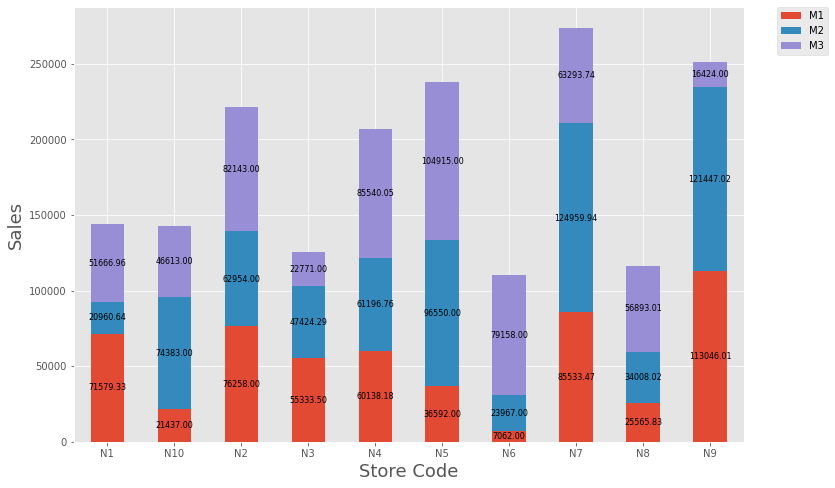

In [ ]:
plt.style.use('ggplot')

ax = salesbystore.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Sales", fontsize=18)
ax.set_xlabel("Store Code", fontsize=18)
plt.show()

2. Sales By Category 

In [ ]:
List_stores = list(data['STORECODE'])
List_stores = list(dict.fromkeys(List_stores))
salesbycategory = data.groupby(['STORECODE','GRP'])['QTY'].sum()
salesbycategory = salesbycategory.to_frame().reset_index()

In [ ]:
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(List_stores)).as_hex())

fig = go.Figure(
    layout = go.Layout(
        title="Sales By Category",
        yaxis_title="Sales",
        xaxis_title="Category", ) 

)
for d,p in zip(List_stores, pal):
    fig.add_trace(go.Bar(x = salesbycategory[salesbycategory['STORECODE']==d]['GRP'],
                             y = salesbycategory[salesbycategory['STORECODE']==d]['QTY'],
                             name = d,
                             #line_color = p, 
                             #fill=None
                         ))   #tozeroy 



fig.show()

3. Sales By Day

In [ ]:
data["MONTH_DAY"] = data["MONTH"].astype(str)+"_"+data["DAY"].astype(str)
salesbyday = data.groupby(['STORECODE','MONTH_DAY'])['VALUE'].sum()
salesbyday = salesbyday.to_frame().reset_index()


In [ ]:
fig_ = go.Figure(layout = go.Layout(
        title="Sales By Day",
        yaxis_title="Sales",
        xaxis_title="Month_Day", )  )
for d,p in zip(List_stores, pal):
    fig_.add_trace(go.Scatter(x = salesbyday[salesbyday['STORECODE']==d]['MONTH_DAY'],
                             y = salesbyday[salesbyday['STORECODE']==d]['VALUE'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy
                          



fig_.show()